In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


# Problem Statement: Predict whether a customer will churn (leave the service) or remain based on their usage patterns, demographics, andcustomer service interactions.

# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [3]:
churn_df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Finding Missing values

In [5]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# missing values finding using value_counts and unique()
here there is no missing values exist but finding missing values using this functions to find any nun values exists

In [6]:
churn_df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [7]:
churn_df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [8]:
churn_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
churn_df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
churn_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Label encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the  column
churn_df['Geography'] = le.fit_transform(churn_df['Geography'])


churn_df['Gender'] = le.fit_transform(churn_df['Gender'])


churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


#  Data Preprocessing

In [15]:
# Drop unnecessary columns (RowNumber, CustomerId, Surname)
churn_df = churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [16]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# Remove outliers

In [17]:
def remove_outliers(df1, columns):
    # Calculate the first and third quartiles
    Q1 = churn_df[columns].quantile(0.25)
    Q3 = churn_df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Filter the DataFrame to remove outliers
    churn_df_filtered = churn_df[(churn_df[columns] >= (Q1 - 1.5 * IQR)) & (churn_df[columns] <= (Q3 + 1.5 * IQR))]
    return churn_df_filtered


# Specify the columns to clean
columns_to_clean = ['Geography','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

# Remove outliers
churn_df_cleaned = remove_outliers(churn_df, columns_to_clean)

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(churn_df_cleaned)

DataFrame after removing outliers:
      CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           619.0          0       0  42.0       2       0.00            1.0   
1           608.0          2       0  41.0       1   83807.86            1.0   
2           502.0          0       0  42.0       8  159660.80            3.0   
3           699.0          0       0  39.0       1       0.00            2.0   
4           850.0          2       0  43.0       2  125510.82            1.0   
...           ...        ...     ...   ...     ...        ...            ...   
9995        771.0          0       1  39.0       5       0.00            2.0   
9996        516.0          0       1  35.0      10   57369.61            1.0   
9997        709.0          0       0  36.0       7       0.00            1.0   
9998        772.0          1       1  42.0       3   75075.31            2.0   
9999        792.0          0       0  28.0       4  130142.79            1.0   

    

# EDA (Explorative data analysis)

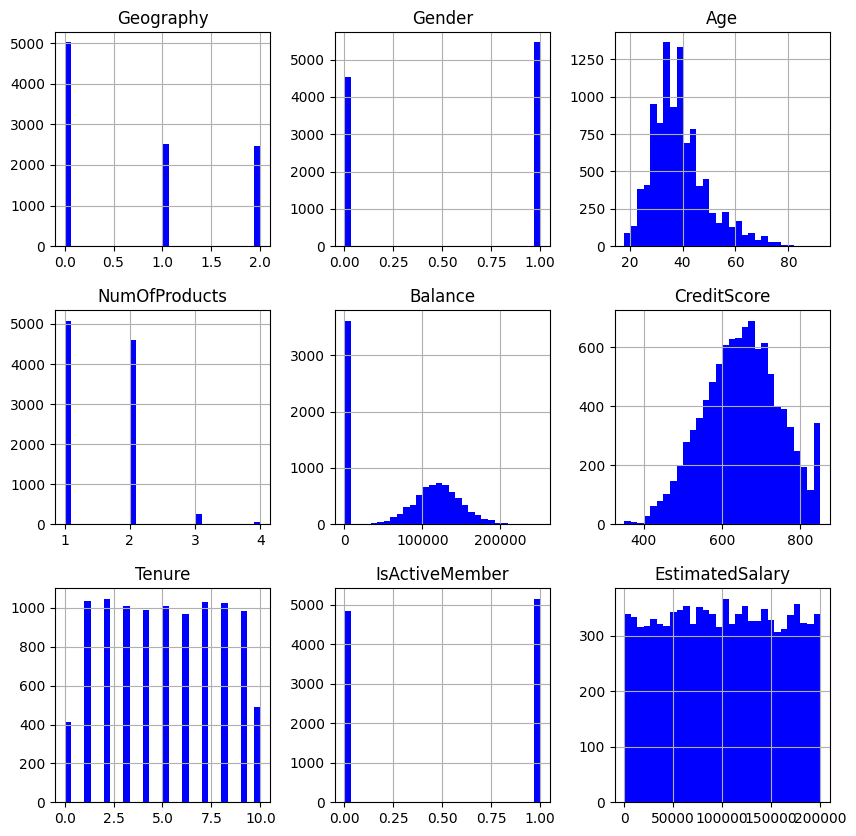

In [18]:
churn_df[['Geography','Gender','Age','NumOfProducts','Balance','CreditScore','Tenure','IsActiveMember','EstimatedSalary']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

# observation:
- The code snippet you provided generates histograms for several columns from the churn_df dataset, focusing on features such as 'Geography,' 'Gender,' 'Age,' 'NumOfProducts,' 'Balance,' 'CreditScore,' 'Tenure,' 'IsActiveMember,' and 'EstimatedSalary.' The hist() function from Pandas is used to plot the distributions of these columns, with a bins=30 argument specifying that each histogram will have 30 bins, allowing for a detailed view of the data spread. The plot size is set to figsize=(10,10), making the output clearer and easier to interpret, while the color='blue' argument ensures all histograms are displayed in a blue hue for uniformity. By running this code, you'll visually examine the frequency distribution of each variable in the dataset, which is crucial for understanding data characteristics and identifying any patterns or outliers that could impact further analysis or model building.

<Axes: xlabel='Geography', ylabel='Gender'>

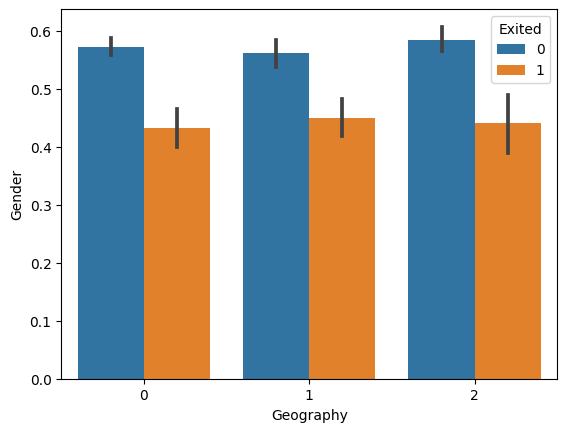

In [19]:
sns.barplot(data = churn_df,x = 'Geography',y = 'Gender',hue = "Exited")

- here the 0 refers to France'
- and the 1 refers to 'Germany'
- and the 2 refers to 'Spain'

# observation:
- The provided code utilizes Seaborn's barplot function to create a bar plot that visualizes the relationship between the 'Geography' and 'Gender' columns in the churn_df dataset, with an additional layer of distinction based on whether the customer has exited the service, as indicated by the 'Exited' column. The x-axis represents 'Geography' (which might denote the customer's location), while the y-axis is set to 'Gender' (which contains categorical data like male or female). The hue='Exited' argument colors the bars based on whether a customer has churned, offering insight into exit patterns across different geographic locations and genders. However, since 'Gender' is categorical, using it on the y-axis may not be appropriate for a bar plot. To address this, a count plot or a different numeric variable could be used for the y-axis, providing a clearer and more meaningful visualization of the data.

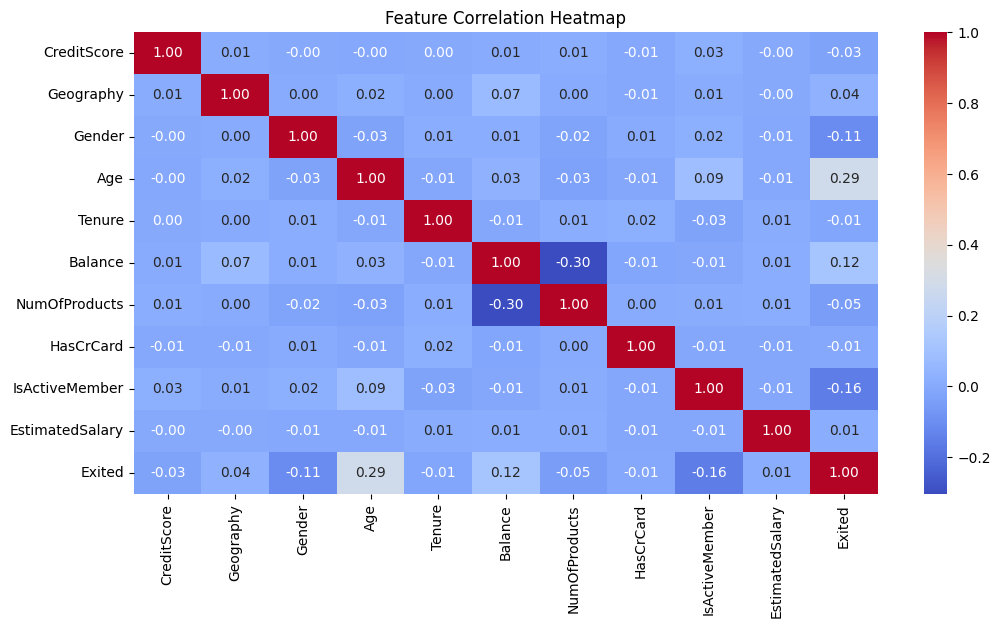

In [20]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(churn_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# observation:
- The code generates a heatmap to visualize the correlation between the features in the churn_df dataset. By using the corr() function, it calculates the pairwise correlations of numeric columns, which are then displayed on the heatmap. The sns.heatmap() function creates the plot, with annot=True ensuring that the correlation values are displayed inside the heatmap cells. The cmap="coolwarm" argument sets the color scheme to range from cool (blue) to warm (red), with stronger correlations represented by more intense colors. The fmt=".2f" formats the correlation values to two decimal places for clarity. The plot's size is set to 12x6 inches for better readability, and the title "Feature Correlation Heatmap" is added to give context to the visualization. This heatmap helps identify the strength and direction of relationships between variables, which is valuable for understanding feature interactions and selecting relevant features for modeling.

# Feature and Target Split

In [21]:
# Features (independent variables)
X = churn_df.drop(columns='Exited')

# Target variable (dependent variable)
y = churn_df['Exited']

# Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [23]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the training set's mean and std)
X_test_scaled = scaler.transform(X_test)

# Classification Models

# 1. Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 100.00%
Test Accuracy: 86.83%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



# 2. LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 78.49%
Test Accuracy: 80.07%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



# 3. DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 100.00%
Test Accuracy: 79.40%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2416
           1       0.47      0.51      0.49       584

    accuracy                           0.79      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.80      0.79      0.80      3000



# 4. GradientBoostingClassifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 87.00%
Test Accuracy: 87.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [28]:
from sklearn.metrics import roc_auc_score

# Store the models and their results
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize an empty dictionary to store performance metrics
results = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        "Train Accuracy": train_accuracy * 100,
        "Test Accuracy": test_accuracy * 100,
        "AUC-ROC": auc_roc
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                     Train Accuracy  Test Accuracy   AUC-ROC
Random Forest            100.000000      86.833333  0.711804
Logistic Regression       78.485714      80.066667  0.528265
Decision Tree            100.000000      79.400000  0.686428
Gradient Boosting         87.000000      87.000000  0.714137


# Prediction

Random Forest: It has perfect training accuracy (100%), but the test accuracy is slightly lower (86.83%), and the AUC-ROC is 0.71. The model seems to be overfitting since there’s a significant difference between the training and testing accuracy.

Logistic Regression: It has a test accuracy of 80.07%, which is lower than other models, and the AUC-ROC is 0.53, indicating that it might not be as strong in distinguishing between the classes.

Decision Tree: Like Random Forest, the Decision Tree has 100% training accuracy but a relatively low test accuracy of 79.4%, with an AUC-ROC of 0.69. This suggests overfitting as well.

Gradient Boosting: It has the highest test accuracy (87.0%) and an AUC-ROC of 0.71. This model shows solid generalization, with no signs of overfitting based on the training-test accuracy comparison.

# Best Model: Gradient Boosting appears to be the best choice for predicting customer churn in this case, as it provides the highest test accuracy (87%) and performs well with the AUC-ROC score of 0.71, making it the most balanced model.

# Conclusion
- The Bank Customer Churn Prediction project successfully identified the key factors contributing to customer churn by using classification models such as Random Forest,Logistic regression,  Decision Trees, and Gradient Boosting. Among these, the Gradient Boosting model delivered the best performance, showing strong accuracy and robustness in predicting customer churn. Key features, such as customer demographics (e.g., age, tenure) and service usage patterns (e.g., monthly spending and account type), were found to significantly influence churn likelihood. This analysis allows the bank to segment customers based on their risk of leaving and target high-risk individuals with tailored retention strategies. By deploying this predictive model, the bank can take proactive measures to reduce churn, such as offering personalized promotions or improving customer service, ultimately enhancing customer loyalty and retention.